### Импорт библиотек
В этом проекте мы используем несколько библиотек, включая numpy, matplotlib и scikit-learn

In [10]:
# Импорт библиотек
import numpy as np # для работы с массивами данных (многомерными матрицами), математическими функциями
import matplotlib.pyplot as plt # для визуализации данных
import pandas as pd # для анализа и манипулирования табличными данными
import operator # для работы с функциями высшего порядка и сортировки

from sklearn.linear_model import LinearRegression # для построения моделей линейной регрессии
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_log_error, r2_score # для вычисления метрик среднеквадратичной ошибки (MSE), RMSE и коэффициента детерминации (R^2) 
from sklearn.preprocessing import PolynomialFeatures # для преобразования исходных признаков в полиномиальные, для построения моделей полиномиальной регрессии


### Импорт базы данных
Мы импортируем базу данных из файла **Position_Salaries.csv**           
Затем мы создаем два массива **X** и **Y** для хранения данных. **X** хранит данные об уровне, а **Y** - данные о заработной плате.

In [2]:
# Импорт базы данных
url = 'https://raw.githubusercontent.com/SiddhantAttavar/PolynomialRegression/master/Position_Salaries.csv' 
datas = pd.read_csv(url) 
print(datas)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
X = datas.iloc[:, 1:2].values 
Y = datas.iloc[:, 2].values 

### Построение набора данных
Мы используем точечную диаграмму для визуализации данных.

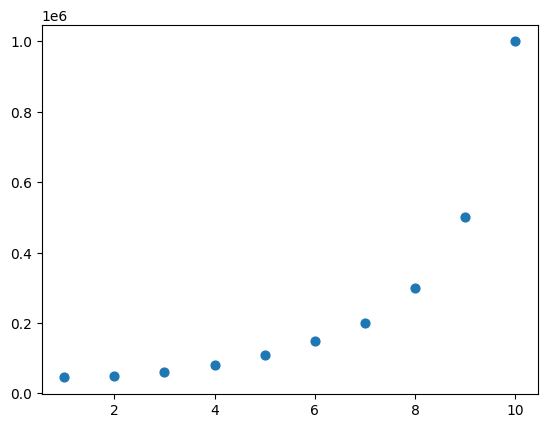

In [4]:
plt.scatter(X, Y, s=40)
plt.show()

### Выполнение полиномиальной регрессии
В этих ячейках мы создаем выполнение полиномиальной регрессии с помощью **scikit-learn**.

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [22]:
# Подгонка полиномиальной регрессии к набору данных

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [24]:
poly.fit(X_poly, Y) 
lin_poly = LinearRegression() 
lin_poly.fit(X_poly, Y) 

LinearRegression()

### Ошибка вычисления
Здесь мы вычисляем значение mean_square_error, RMSE и показатель R^2.

In [25]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [26]:
mse = mean_squared_error(Y,lin_poly.predict(poly.fit_transform(X)))
rmse = root_mean_squared_error(Y,lin_poly.predict(poly.fit_transform(X)))
mae = mean_absolute_error(Y,lin_poly.predict(poly.fit_transform(X)))
mape = mean_absolute_percentage_error(Y,lin_poly.predict(poly.fit_transform(X)))
rmsle = root_mean_squared_log_error(Y,lin_poly.predict(poly.fit_transform(X)))
r2 = r2_score(Y,lin_poly.predict(poly.fit_transform(X)))

print(f"MSE = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAE = {mae:.3f}")
print(f"MAPE = {mape:.3f}")
print(f"RMSLE = {rmsle:.3f}")
print(f"R2 = {r2:.3f}")

MSE = 210343822.844
RMSE = 14503.235
MAE = 12681.818
MAPE = 0.109
RMSLE = 0.170
R2 = 0.997


Значение RMSE составляет 82212,124. Это показывает среднюю величину отклонения прогнозов от фактических значений. 

Коэффициент R² равен 0,916, что указывает на то, что около 91,6% вариации в данных объясняется моделью. Это говорит о высокой степени соответствия модели данным.

MSE очень велика — 6758833333,333 — и это может быть связано с большими значениями в данных или наличием выбросов.

### Визуализация результатов
Сначала мы находим функцию, сгенерированную с помощью полиномиальной регрессии, а затем строим график результатов

In [19]:
print(lin_poly.coef_)
print(lin_poly.intercept_)

[     0.         180664.33566432 -48548.95104895   4120.04662005]
-121333.33333330264


In [20]:
res = "f(x) = " + str(lin_poly.intercept_)

for i,r in enumerate(lin_poly.coef_):
    res = res + " + {}*x^{} ".format("%.2f" % r, i)

print (res)

f(x) = -121333.33333330264 + 0.00*x^0  + 180664.34*x^1  + -48548.95*x^2  + 4120.05*x^3 


In [21]:
def plot_polynomial_regression(
    x, 
    y, 
    y_predict_poly, 
    func=plt.scatter, 
    title='Полиномиальная регрессия', 
    x_label='Уровень должности (x)', 
    y_label='Зарплата (y)', 
    figsize=(10, 8)
    ):
    """
    Визуализирует результаты полиномиальной регрессии.

    Args:
        x (array-like): Независимая переменная.
        y (array-like): Зависимая переменная.
        model: Обученная модель полиномиальной регрессии.
        polynomial_features: Объект PolynomialFeatures, использованный для преобразования данных.
        title (str): Заголовок графика.
        x_label (str): Подпись оси X.
        y_label (str): Подпись оси Y.
        figsize (tuple): Размер фигуры (ширина, высота) в дюймах.
    """

    plt.figure(figsize=figsize)  # Увеличиваем размер графика
    plt.scatter(x, y, color='blue', label='Данные')  # Добавляем label
    func(x, y_predict_poly, color='red', label='Прогнозируемая модель')  # Используем plot вместо scatter и добавляем label
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()  # Добавляем легенду
    plt.grid(True)  # Добавляем сетку для лучшей читаемости
    plt.show()

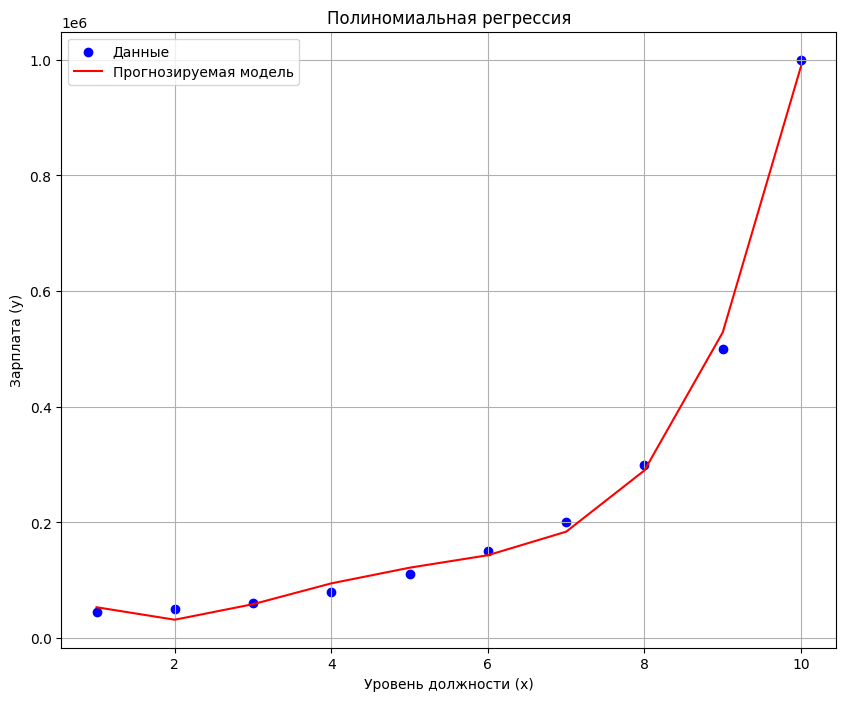

In [27]:
# Визуализация результатов полиномиальной регрессии
plot_polynomial_regression(X, Y, lin_poly.predict(poly.fit_transform(X)), func=plt.plot)

### Тестируем модель
Используя нашу модель, мы прогнозируем заработную плату для 11-го уровня.

In [28]:
# Прогнозирование нового результата с помощью полиномиальной регрессии
lin_poly.predict(poly.fit_transform([[11.0]]))[0] 


1780833.3333335808